In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
fetal_df=pd.read_csv("Resources/fetal_health.csv")
fetal_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
fetal_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
print(f"No of Rows and columns :{fetal_df.shape}")

No of Rows and columns :(2126, 22)


In [5]:
fetal_df["fetal_health"]=fetal_df["fetal_health"].astype("int64")

In [6]:
fetal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Description of columns


baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)

accelerations - Number of accelerations per second

fetal_movement - Number of fetal movements per second

uterine_contractions - Number of uterine contractions per second

light_decelerations - Number of light decelerations per second

severe_decelerations - Number of severe decelerations per second

prolongued_decelerations - Number of prolonged decelerations per second

abnormal_short_term_variability - Percentage of time with abnormal short-term variability

mean_value_of_short_term_variability - Mean value of short-term variability

percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability

mean_value_of_long_term_variability - Mean value of long-term variability

histogram_width - Width of FHR histogram (generated from exam)

histogram_min - Minimum of FHR histogram (generated from exam)

histogram_max - Maximum of FHR histogram (generated from exam)

histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)

histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)

histogram_mode - Mode of FHR histogram (generated from exam)

histogram_mean - Mean of FHR histogram (generated from exam)

histogram_median - Median of FHR histogram (generated from exam)

histogram_variance - Variance of FHR histogram (generated from exam)

histogram_tendency - Tendency of FHR histogram (generated from exam)

fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological



In [7]:
# renaming column
fetal_df = fetal_df.rename(columns = {"baseline value":"baseline_FHR_bpm",
                                      "prolongued_decelerations": "prolonged_decelerations",
                                     "histogram_width": "FHR_hist_width",
                                    "histogram_min": "FHR_hist_min",
                                    "histogram_max": "FHR_hist_max",
                                    "histogram_number_of_peaks": "FHR_hist_num_peaks",
                                    "histogram_number_of_zeroes": "FHR_hist_num_zeroes",
                                    "histogram_mode": "FHR_hist_mode",
                                    "histogram_mean": "FHR_hist_mean",
                                    "histogram_median": "FHR_hist_median",
                                    "histogram_variance": "FHR_hist_variance",
                                    "histogram_tendency": "FHR_hist_tendency",
                                    "abnormal_short_term_variability":"abnorm_ST_Var_Perc",
                                    "mean_value_of_short_term_variability" : "mean_ST_Var",                 
                                     "percentage_of_time_with_abnormal_long_term_variability":"abnorm_LT_Var_Perc",
                                     "mean_value_of_long_term_variability":"mean_LT_Var"
                                     })
fetal_df.columns

Index(['baseline_FHR_bpm', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnorm_ST_Var_Perc', 'mean_ST_Var',
       'abnorm_LT_Var_Perc', 'mean_LT_Var', 'FHR_hist_width', 'FHR_hist_min',
       'FHR_hist_max', 'FHR_hist_num_peaks', 'FHR_hist_num_zeroes',
       'FHR_hist_mode', 'FHR_hist_mean', 'FHR_hist_median',
       'FHR_hist_variance', 'FHR_hist_tendency', 'fetal_health'],
      dtype='object')

In [8]:
fetal_df.to_csv("Resources/clean_fetal_health.csv", index=False)

In [9]:
#check the value counts of fetal health
health_status_ct=fetal_df["fetal_health"].value_counts()
health_status_ct

fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

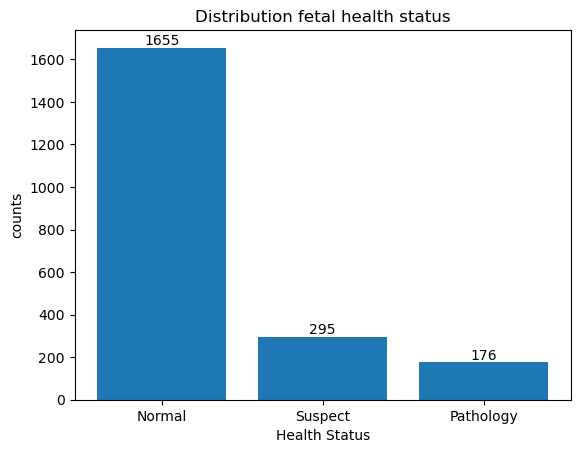

In [10]:
#plot the bar chart

labels = ["Normal", "Suspect", "Pathology"]
plt.bar(labels,health_status_ct)
plt.xlabel("Health Status")
plt.ylabel("counts")
plt.title("Distribution fetal health status")

# Add count labels on top of each bar
for i, count in enumerate(health_status_ct):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.show()

Text(0.5, 1.0, 'Distribution of Fetal Health')

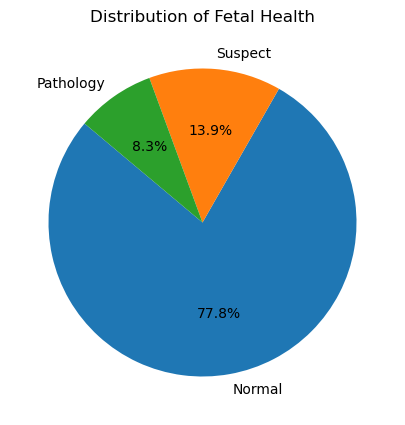

In [11]:
# Plot the pie chart
plt.figure(figsize=(7, 5))  # Optional: Set the figure size
plt.pie(health_status_ct, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Fetal Health")


## Machine learning Model

Create the labels set (y) from the “fetal_health” column
and then create the features (X) DataFrame from the remaining columns.

In [12]:
# Separate the data into labels and features
# Separate the y variable, the labels
target=fetal_df["fetal_health"]
# Separate the X variable, the features
data = fetal_df.drop("fetal_health",axis=1)
features_df=data.columns


In [13]:
#check the label and features
print(target)
print(features_df)

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64
Index(['baseline_FHR_bpm', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnorm_ST_Var_Perc', 'mean_ST_Var',
       'abnorm_LT_Var_Perc', 'mean_LT_Var', 'FHR_hist_width', 'FHR_hist_min',
       'FHR_hist_max', 'FHR_hist_num_peaks', 'FHR_hist_num_zeroes',
       'FHR_hist_mode', 'FHR_hist_mean', 'FHR_hist_median',
       'FHR_hist_variance', 'FHR_hist_tendency'],
      dtype='object')


In [14]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=48)

In [15]:
#value of count of training dataset
#X_train.shape
train_data=pd.Series(y_train).value_counts()
train_data

fetal_health
1    1245
2     220
3     129
Name: count, dtype: int64

In [16]:
#value of count of testing dataset
#x_test.shape()
test_data=pd.Series(y_test).value_counts()
test_data

fetal_health
1    410
2     75
3     47
Name: count, dtype: int64

## Random Oversampling technique to balance the class distribution.

In [17]:
#instantiate the random_oversampler 
Sampler = RandomOverSampler(random_state=48)
X_sample, y_sample = Sampler.fit_resample(X_train,y_train)

# Fit the original training data to the random_oversampler 
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_sample, y_sample, random_state=48)

In [18]:
#value of count of training dataset after ros
#X_train.shape
train_data_ros=pd.Series(y_train_ros).value_counts()
train_data_ros=train_data_ros.sort_index()
train_data_ros

fetal_health
1    922
2    932
3    947
Name: count, dtype: int64

In [19]:
#value of count of testing dataset after ros
#x_test.shape()
test_data_ros=pd.Series(y_test_ros).value_counts()
test_data_ros

fetal_health
1    323
2    313
3    298
Name: count, dtype: int64

<Figure size 1000x2000 with 0 Axes>

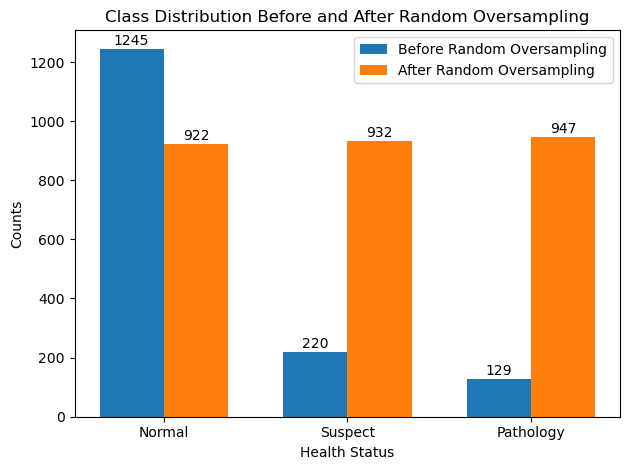

In [20]:
#set the labels

labels = ["Normal", "Suspect", "Pathology"]

# Generate evenly spaced x positions for the bars
x = np.arange(len(labels))

# Define the width of the bars
width = 0.35  

   
plt.figure(figsize=(10,20))

# Create subplots
fig, ax = plt.subplots()

# Plot the bars for the original data
rects1 = ax.bar(x - width/2, train_data, width, label='Before Random Oversampling')

# Plot the bars for the oversampled data
rects2 = ax.bar(x + width/2, train_data_ros, width, label='After Random Oversampling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Health Status')
ax.set_ylabel('Counts')
ax.set_title('Class Distribution Before and After Random Oversampling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add counts on top of each bar using enumerate
for i, rect in enumerate(rects1 + rects2):
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,0.7),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

 
plt.tight_layout()


# Display the plot
plt.show()

## Random Forest 


In [21]:
#create Random Forest classifier
rf = RandomForestClassifier(n_estimators=500, random_state=48)

# Train the classifier
rf.fit(X_train_ros, y_train_ros)

RandomForestClassifier(n_estimators=500, random_state=48)

In [22]:
#Make predictions on the test set
predictions_rf = rf.predict(X_test_ros)

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test_ros, predictions_rf)
print("Accuracy_RF:", accuracy)

Accuracy_RF: 0.9850107066381156


In [24]:
#Generate confusion matrix
cm=confusion_matrix(y_test_ros, predictions_rf)
cm_df=pd.DataFrame(cm,index=["Normal","Suspect","pathology"],columns=["Normal","Suspect","pathology"])
print("Random Forest Confusion Matix")
cm_df

Random Forest Confusion Matix


,Normal,Suspect,pathology
Normal,309,11,3
Suspect,0,313,0
pathology,0,0,298


In [25]:
# print the classification report
print(" Random Forest using random over sampler")
print(classification_report(y_test_ros, predictions_rf))

 Random Forest using random over sampler
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       323
           2       0.97      1.00      0.98       313
           3       0.99      1.00      0.99       298

    accuracy                           0.99       934
   macro avg       0.99      0.99      0.99       934
weighted avg       0.99      0.99      0.98       934



In [26]:
# # Get feature importances
# importances =rf.feature_importances_

# # Get indices of top 10 features
# top_indices = np.argsort(importances)[::-1][:10]



# # Print top 10 important features
# print("Top 10 important features:")
# for i, index in enumerate(top_indices, 1):
#     print(f"{i}. {features_df[index]}: {importances[index]}")

In [27]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
# We can sort the features by their importance
importances_sorted=sorted(zip(rf.feature_importances_, data.columns), reverse=True)
print("Top 10 important features")
importances_sorted[:10]

Top 10 important features


[(0.14600600933884722, 'abnorm_ST_Var_Perc'),
 (0.13546691739045968, 'abnorm_LT_Var_Perc'),
 (0.10148506240155915, 'FHR_hist_mean'),
 (0.08866793084544976, 'FHR_hist_median'),
 (0.06978970401868248, 'mean_ST_Var'),
 (0.06901786668657461, 'accelerations'),
 (0.057072590926319396, 'FHR_hist_mode'),
 (0.051538572728352314, 'mean_LT_Var'),
 (0.04299194886763145, 'baseline_FHR_bpm'),
 (0.03687131787770955, 'prolonged_decelerations')]

In [28]:
# # Sort importances and indices in ascending order
# sorted_indices = np.argsort(importances[top_indices])
# sorted_importances = importances[top_indices][sorted_indices]

# plt.figure(figsize=(10, 6))
# plt.barh(range(len(top_indices)), sorted_importances, color="purple")  # Using purple color
# plt.yticks(range(len(top_indices)), [features_df[i] for i in top_indices[sorted_indices]])
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.title("Top 10 Important Features")
# plt.show()

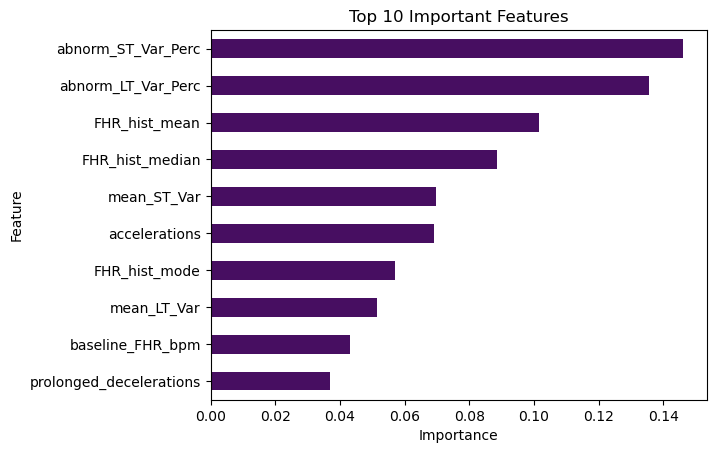

In [29]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf.feature_importances_, data.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: "Feature Importances"}, inplace=True)
importances_sorted = importances_df.sort_values(by="Feature Importances")

# Selecting only the top 10 important features
top_10_importances = importances_sorted.tail(10)

# Plotting the top 10 important features
top_10_importances.plot(kind="barh",color=plt.cm.viridis(top_10_importances["Feature Importances"]), title="Top 10 Important Features", legend=False)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Gradient Boosting classifier


In [30]:
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=48)

In [31]:
# Train the classifier on the training data
gb_classifier.fit(X_train_ros, y_train_ros)


GradientBoostingClassifier(random_state=48)

In [32]:
# Make predictions on the testing data
predictions_gb = gb_classifier.predict(X_test_ros)

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test_ros, predictions_gb)
print("Accuracy_gb:", accuracy)


Accuracy_gb: 0.9817987152034261


In [34]:
# Generate a confusion matrix
cm = confusion_matrix(y_test_ros, predictions_gb)
print("Confusion Matrix:")
cm_df=pd.DataFrame(cm,index=["Normal","Suspect","pathology"],columns=["Normal","Suspect","pathology"])
print("Grandient Boosting Classifier")
cm_df

Confusion Matrix:
Grandient Boosting Classifier


,Normal,Suspect,pathology
Normal,308,13,2
Suspect,2,311,0
pathology,0,0,298


In [35]:
# Generate a classification report
print("GB Classification Report :")
print(classification_report(y_test_ros, predictions_gb))

GB Classification Report :
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       323
           2       0.96      0.99      0.98       313
           3       0.99      1.00      1.00       298

    accuracy                           0.98       934
   macro avg       0.98      0.98      0.98       934
weighted avg       0.98      0.98      0.98       934



## KNN classifier 


In [36]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [37]:
# Train the classifier on the training data
knn.fit(X_train_ros, y_train_ros)



KNeighborsClassifier(n_neighbors=3)

In [38]:
# Make predictions on the testing data
predictions_knn= knn.predict(X_test_ros)

In [39]:
# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test_ros,predictions_knn)
print("Accuracy_Knn:", accuracy_knn)

Accuracy_Knn: 0.9507494646680942


In [40]:
# Generate a confusion matrix
cm = confusion_matrix(y_test_ros, predictions_knn)
print("Confusion Matrix:")
cm_df=pd.DataFrame(cm,index=["Normal","Suspect","pathology"],columns=["Normal","Suspect","pathology"])
print("KNN Boosting Classifier")
cm_df

Confusion Matrix:
KNN Boosting Classifier


,Normal,Suspect,pathology
Normal,287,35,1
Suspect,7,306,0
pathology,3,0,295


In [41]:
# Generate a classification report
print("KNN Classification Report :")
print(classification_report(y_test_ros, predictions_knn))

KNN Classification Report :
              precision    recall  f1-score   support

           1       0.97      0.89      0.93       323
           2       0.90      0.98      0.94       313
           3       1.00      0.99      0.99       298

    accuracy                           0.95       934
   macro avg       0.95      0.95      0.95       934
weighted avg       0.95      0.95      0.95       934

